In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"] == 2).astype(np.float64)

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 0)

In [14]:
unique_elements,count_elements = np.unique(y,return_counts = True)

In [9]:
print(unique_elements)

[0. 1.]


In [10]:
print(count_elements)

[100  50]


In [15]:
for train_index,test_index in splitter.split(X,y):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]


In [16]:
unique_elements,count_elements = np.unique(y_train,return_counts = True)

In [18]:
count_elements/sum(count_elements)

array([0.66666667, 0.33333333])

In [19]:
svm_clf = Pipeline([('scaler',StandardScaler()),
                   ('linear_svc',LinearSVC(C = 1, loss = 'hinge'))])
svm_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [20]:
y_pred = svm_clf.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test,y_pred)

array([[19,  1],
       [ 1,  9]], dtype=int64)

The Linear SVC class used here regularizes the bias term, hence it is always important to center the training set first by substracting it's mean. This is already done by Standard Scaler.

<h3>Nonlinear SVM Classification</h3>

As datasets are rarely linearly separable, linear SVM class is not always applicable.
Instead it is better to add more features, such as polynomial features. 

In [25]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

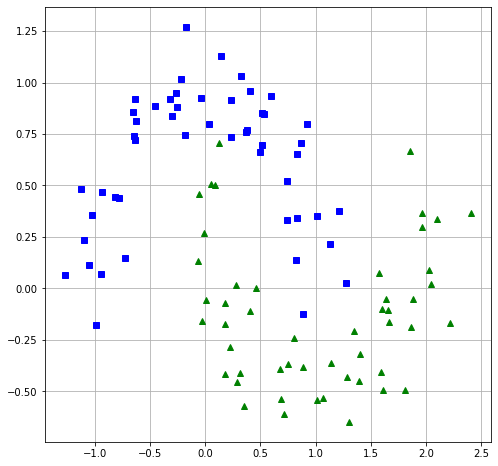

In [33]:
X,y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

idx_1 = np.where(y == 1)[0]
idx_0 = np.where(y == 0)[0]

fig,ax = plt.subplots(1,1,figsize = (8,8))
ax.plot(X[:,0][idx_1],X[:,1][idx_1],'g^')
ax.plot(X[:,0][idx_0],X[:,1][idx_0],'bs')
ax.grid()


The above dataset is impossible to be linearly classified, hence it is required that we change the dimension of this by adding in a polynomial